# Ford Go Bike Visualization
## HaoNM

## Introduction
> At this session, i will download data of ford go bike system from 1-2019 -> 12->2019 to analyze it. Ford GoBike is the Bay Area's bike share.


## Preliminary Wrangling


In [1]:
# Upgrade to using powerfull of lib
!pip install seaborn==0.9.0

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import zipfile
import io
import os
from matplotlib.ticker import StrMethodFormatter
from matplotlib import rcParams

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


### Wrangling data

In [3]:
# Download file and extract it
listUrlDataFile = [
    'https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip',
    'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip'
]

output_file = 'merged.csv'
# for url in listUrlDataFile:
#     response = requests.get(listUrlDataFile)
#     zip_file = zipfile.ZipFile(io.BytesIO(response.content))
#     zip_file.extractall()
#     zip_file.close()

# # Find file with extension ".csv" and merge all file download to one file and put back to workspace
# dataMerged = pd.concat([pd.read_csv(f) for f in glob.glob(os.path.join(os.getcwd(), '*.csv'))], ignore_index=True, sort=False)
# # # Export to csv
# dataMerged.to_csv(output_file, index=False)

#  make csv folder
os.makedirs('csv_files', exist_ok=True)

# Download data to workspace
for url in listUrlDataFile:
    filename = url.split('/')[-1]
    csv_filename = filename.replace('.zip', '.csv')
    response = requests.get(url)
    
    with open(filename, 'wb') as f:
        f.write(response.content)
        
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('csv_files')
        
    os.remove(filename)

# Merge all csv
combined_data = pd.DataFrame()
for file in os.listdir('csv_files'):
    if file.endswith('.csv'):
        filepath = os.path.join('csv_files', file)
        df = pd.read_csv(filepath)
        combined_data = pd.concat([combined_data, df], ignore_index=True)
        
# Save file.
combined_data.to_csv(output_file, index=False)

print("Finish merge csv file")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  int

Finnish merge csv file


In [4]:
# Load data
df = pd.read_csv(output_file, low_memory=False)
df.shape
# !pwd

(2506983, 15)

In [5]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1416,No,48877,60.0,37.774520,-122.409449,8th St at Ringold St,2019-06-01 10:09:34.7960,NaN,321.0,37.780146,-122.403071,5th St at Folsom,2019-05-31 20:34:56.8110,Customer
1,1797,No,47050,266.0,37.862464,-122.264791,Parker St at Fulton St,2019-06-01 08:48:06.9190,NaN,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-05-31 19:43:56.1960,Subscriber
2,3612,No,5912,149.0,37.831275,-122.285633,Emeryville Town Hall,2019-06-01 01:32:56.9820,NaN,149.0,37.831275,-122.285633,Emeryville Town Hall,2019-05-31 23:54:24.0890,Customer
3,2333,No,2629,186.0,37.801319,-122.262642,Lakeside Dr at 14th St,2019-06-01 00:43:46.8740,NaN,186.0,37.801319,-122.262642,Lakeside Dr at 14th St,2019-05-31 23:59:57.4490,Customer
4,181,No,4235,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-06-01 00:16:24.4570,NaN,34.0,37.783988,-122.412408,Father Alfred E Boeddeker Park,2019-05-31 23:05:48.9320,Subscriber


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [7]:
df.describe()


,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06
mean,2.789833e+04,8.076483e+02,1.427044e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776506e+01,-1.223499e+02
std,1.146067e+05,1.974714e+03,1.214296e+02,2.392885e-01,7.080417e-01,1.223171e+02,1.363698e-01,3.089648e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [10]:
df.isnull().sum()

bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

In [11]:
df.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [12]:
df.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [13]:

df.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [14]:
df.duration_sec.describe()

count    2.506983e+06
mean     8.076483e+02
std      1.974714e+03
min      6.000000e+01
25%      3.590000e+02
50%      5.710000e+02
75%      8.870000e+02
max      9.121100e+05
Name: duration_sec, dtype: float64

### Cleaning Data

In [15]:
# Copy data to clean, not effect to master data
df_cp = df.copy()

In [16]:
# Confirm min/max of duration sec
print(df_cp.duration_sec.min())
print(df_cp.duration_sec.max())

60
912110


In [17]:
# So i cleand the value abnormal (min 60s ~ 1 min / max 921,110s ~ (921110/60/60/24 about more than 10days ))
df_cp = df_cp[df_cp.duration_sec != df_cp.duration_sec.min()] 
df_cp = df_cp[df_cp.duration_sec != df_cp.duration_sec.max()] 
df_cp.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,2.506944e+06,2.506944e+06,2.424075e+06,2.506944e+06,2.506944e+06,2.426243e+06,2.506944e+06,2.506944e+06
mean,2.789014e+04,8.072962e+02,1.427042e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776507e+01,-1.223499e+02
std,1.145835e+05,1.888989e+03,1.214296e+02,2.392886e-01,7.080466e-01,1.223171e+02,1.363678e-01,3.089657e-01
min,4.000000e+00,6.100000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,8.623000e+04,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [18]:
# Fix filed are not correct dtype.
df_cp.start_time = pd.to_datetime(df_cp['start_time'])
df_cp.end_time = pd.to_datetime(df_cp['end_time'])

df_cp.start_station_id = df_cp['start_station_id'].astype(str)
df_cp.end_station_id = df_cp['end_station_id'].astype(str)
df_cp.bike_id = df_cp['bike_id'].astype(str)

df_cp.user_type = df_cp['user_type'].astype('category')
df_cp.bike_share_for_all_trip = df_cp['bike_share_for_all_trip'].astype('category')
df_cp.rental_access_method = df_cp['rental_access_method'].astype('category')


In [19]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506944 entries, 0 to 2506982
Data columns (total 15 columns):
bike_id                    object
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             object
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
rental_access_method       category
start_station_id           object
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 255.8+ MB


> After change dtype, data has correct. Now we go to analyze it.

In [20]:
df_cp.shape

(2506944, 15)

In [21]:
# Add column needed to verify by duration_sec
# Break from start_time to calc
df_cp['start_date'] = df_cp.start_time.dt.strftime('%m-%d-%Y')
df_cp['start_hourofday'] = df_cp.start_time.dt.strftime('%H')
df_cp['start_dayofweek'] = df_cp.start_time.dt.strftime('%A')
df_cp['start_month'] = df_cp.start_time.dt.strftime('%B')

df_cp.head(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,start_date,start_hourofday,start_dayofweek,start_month
0,1416,No,48877,60.0,37.774520,-122.409449,8th St at Ringold St,2019-06-01 10:09:34.796,NaN,321.0,37.780146,-122.403071,5th St at Folsom,2019-05-31 20:34:56.811,Customer,05-31-2019,20,Friday,May
1,1797,No,47050,266.0,37.862464,-122.264791,Parker St at Fulton St,2019-06-01 08:48:06.919,NaN,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-05-31 19:43:56.196,Subscriber,05-31-2019,19,Friday,May
2,3612,No,5912,149.0,37.831275,-122.285633,Emeryville Town Hall,2019-06-01 01:32:56.982,NaN,149.0,37.831275,-122.285633,Emeryville Town Hall,2019-05-31 23:54:24.089,Customer,05-31-2019,23,Friday,May
3,2333,No,2629,186.0,37.801319,-122.262642,Lakeside Dr at 14th St,2019-06-01 00:43:46.874,NaN,186.0,37.801319,-122.262642,Lakeside Dr at 14th St,2019-05-31 23:59:57.449,Customer,05-31-2019,23,Friday,May
4,181,No,4235,368.0,37.785434,-122.419622,Myrtle St at Polk St,2019-06-01 00:16:24.457,NaN,34.0,37.783988,-122.412408,Father Alfred E Boeddeker Park,2019-05-31 23:05:48.932,Subscriber,05-31-2019,23,Friday,May


In [22]:
# Export data clean to file to using for report
df_cp.to_csv('cleaned_dataset.csv',index=False)

### What is the structure of your dataset?

> Initially I see the data has 2506983 records , after cleaning invalid data of duration_sec I see data set reduced to 2506944 records and 15 columns

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the travel time of each trip. Based on the user type, I want to analyze the preferences, average travel time and bicycle usage frequency of different types of users (Subscriber & Customer)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Information about the date, time and duration of the ride helps me see how long the ride will take. By analyzing the travel time of the trip (starting and ending) I was able to calculate the average of the trips and from that I was able to analyze the preferences, frequency of use by group information. message of type user

## Univariate Exploration


## duration_sec chart

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e79408d68>]], dtype=object)

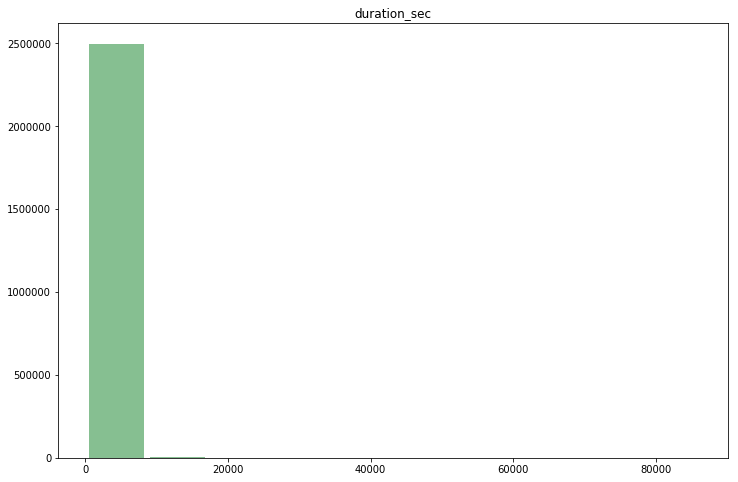

In [23]:
df_cp.hist(column='duration_sec', grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

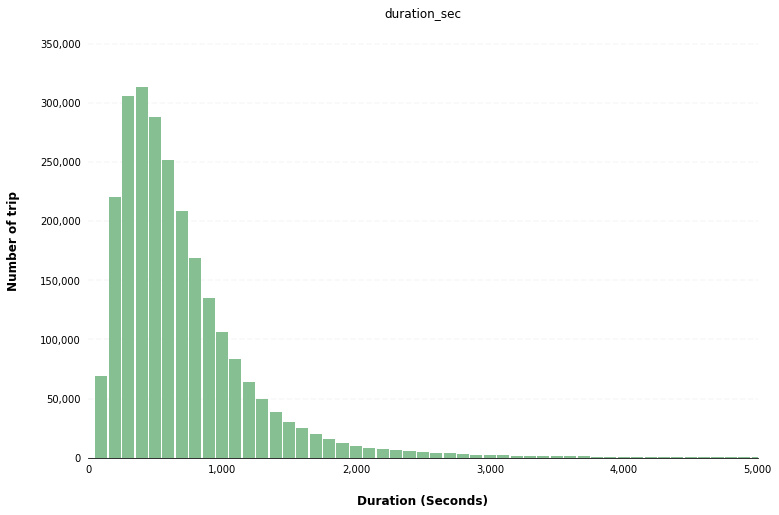

In [24]:
# Because very hard to see , so i limited duration_sec to 5000 seconds and re-draw chart
# Each column in the chart represents 100 units
chart = df_cp.hist(column='duration_sec', bins=np.arange(50, df_cp.duration_sec.max(), 100), grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

chart = chart[0]
for x in chart:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)
    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of trip", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    
    # Limit range x
    x.set_xlim(0, 5000)


> Conclusion: The highest duration_sec is 500seconds. It mean almost people ride at here.

## start_time chart

In [25]:
# Set the figure size base
rcParams['figure.figsize'] = 12, 8
# Re-calculate count
type_counts = df_cp['duration_sec'].value_counts()

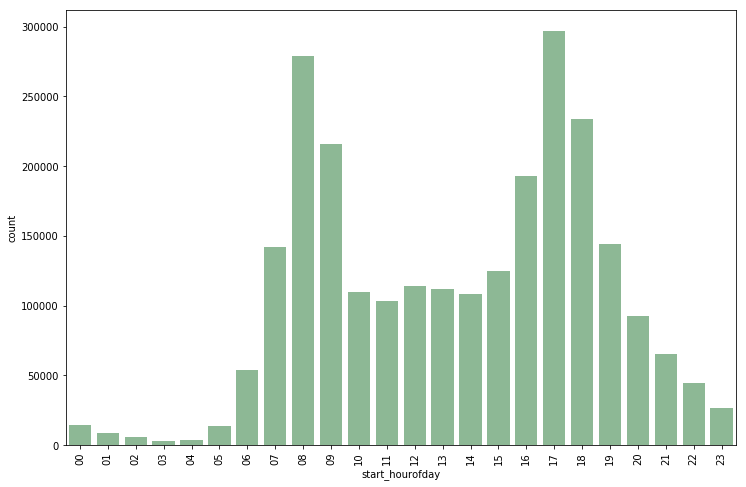

In [26]:
# Chart count by start hours
sb.countplot(data=df_cp, x='start_hourofday', color='#86bf91')

# Get the current tick locations and labels of the x-axis
locs, labels = plt.xticks(rotation=90)

# # Re-calculate count
# type_counts = df_cp['duration_sec'].value_counts()

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # Check if the label exists in the type_counts dictionary
    if label.get_text() in type_counts:
        # Get the count for the corresponding label
        count = type_counts[label.get_text()]
        # Calculate the percentage
        pct_string = '{:0.1f}%'.format(100 * count)

        # Print the annotation just above the top of the bar
        plt.text(loc, count + 2, pct_string, ha='center', color='black')

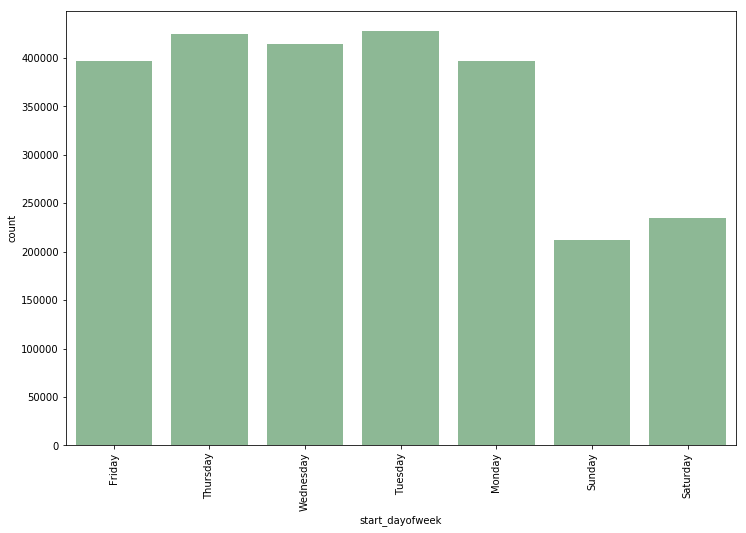

In [27]:
# Chart number of trip in weeks
sb.countplot(data=df_cp, x='start_dayofweek', color='#86bf91')

# Get the current tick locations and labels of the x-axis
locs, labels = plt.xticks(rotation=90)

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # Check if the label exists in the type_counts dictionary
    if label.get_text() in type_counts:
        # Get the count for the corresponding label
        count = type_counts[label.get_text()]
        # Calculate the percentage
        pct_string = '{:0.1f}%'.format(100 * count)

        # Print the annotation just above the top of the bar
        plt.text(loc, count + 2, pct_string, ha='center', color='black')

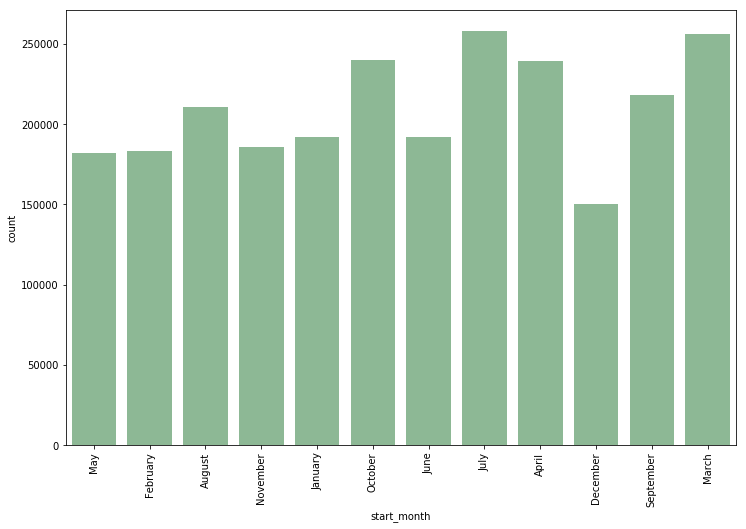

In [28]:
# Chart number of trip in month
# Chart count by start hour
sb.countplot(data=df_cp, x='start_month', color='#86bf91')

# Get the current tick locations and labels of the x-axis
locs, labels = plt.xticks(rotation=90)

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # Check if the label exists in the type_counts dictionary
    if label.get_text() in type_counts:
        # Get the count for the corresponding label
        count = type_counts[label.get_text()]
        # Calculate the percentage
        pct_string = '{:0.1f}%'.format(100 * count)

        # Print the annotation just above the top of the bar
        plt.text(loc, count + 2, pct_string, ha='center', color='black')

### Conclusion
* With hours chart, bicycle usage increases from 7am to 9am in the morning and decreases from 10am to 3pm, then increases again from 4pm to 6pm and continues to decrease again from 7pm onwards. Bicycle usage peaks at 8am and 5pm
* With week chart, bike usage is high during the week and decreases on the weekend.
* With chart month, December is probably the month with the least use of bicycles. The two months with the most use of bicycles are March and July.

### user_type chart

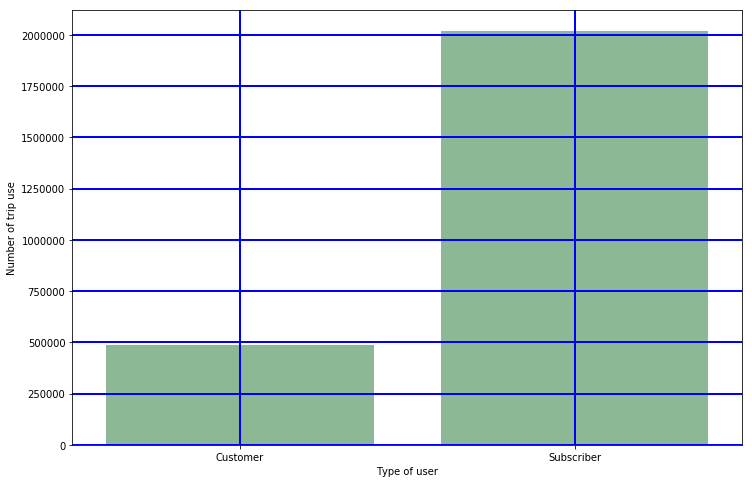

In [29]:
sb.countplot(data=df_cp, x='user_type', color='#86bf91')
plt.xlabel('Type of user')
plt.ylabel('Number of trip use')
plt.grid(color='blue', linestyle='-', linewidth=2)

### Conclusion:
> See the chart user_type, customer user ~ 50k , subscriber user ~ 200k. The number of users using subscribers is 4 times higher than customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The highest duration_sec is 500seconds. It mean almost people ride at here.
* With hours chart, bicycle usage increases from 7am to 9am in the morning and decreases from 10am to 3pm, then increases again from 4pm to 6pm and continues to decrease again from 7pm onwards. Bicycle usage peaks at 8am and 5pm.
* With week chart, bike usage is high during the week and decreases on the weekend.
* With chart month, December is probably the month with the least use of bicycles. The two months with the most use of bicycles are March and July.
* From the start_time column I separate by hour, day and month and create additional columns for the separated categories for analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There are very long or very short trips. For example, I have eliminated the very short trip of about 60 seconds and the very long trip of more than 10 days. These day trips are not valid for analysis.

## Bivariate Exploration

> 

In [30]:
# Limit data frame by duration sec 
litmit_frame = df_cp.query('duration_sec < 6000')

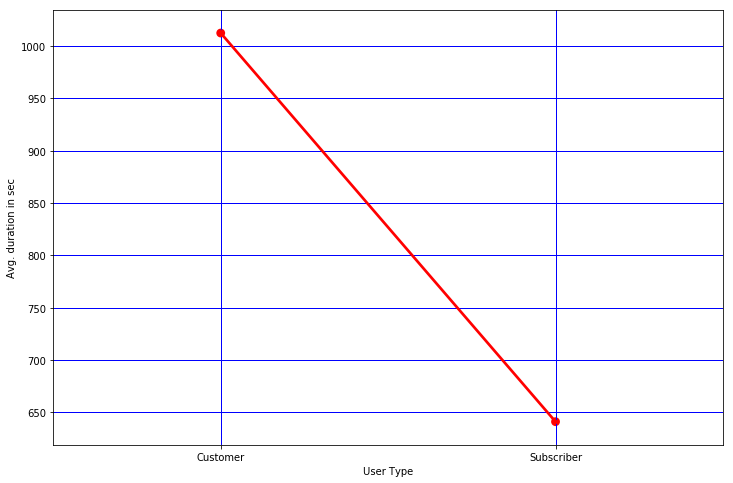

In [31]:
# Chart duration sec by user type
sb.pointplot(data = litmit_frame, x = 'user_type', y = 'duration_sec', color = 'red')
plt.xlabel('User Type')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.show()

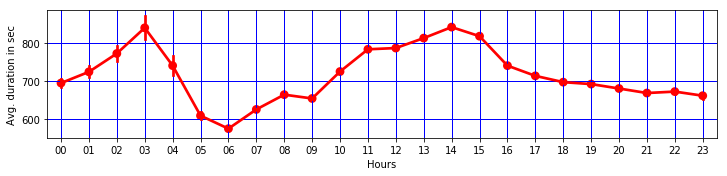

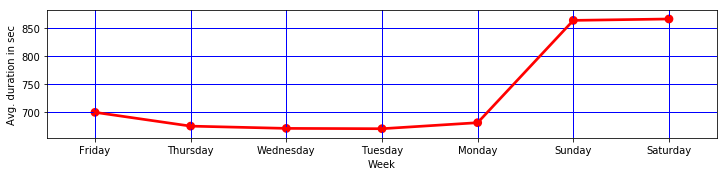

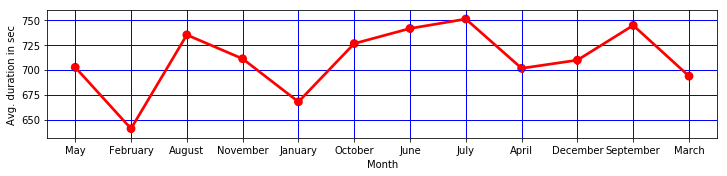

In [32]:
# Draw chart duration sec vs hour, week, month
plt.subplot(3, 1, 1)
sb.pointplot(data = litmit_frame, x = 'start_hourofday', y = 'duration_sec', color = 'red')
plt.xlabel('Hours')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.show()

plt.subplot(3, 1, 2)
sb.pointplot(data = litmit_frame, x = 'start_dayofweek', y = 'duration_sec', color = 'red')
plt.xlabel('Week')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.show()

plt.subplot(3, 1, 3)
sb.pointplot(data = litmit_frame, x = 'start_month', y = 'duration_sec', color = 'red')
plt.xlabel('Month')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.show()

### Conclusion
* With the daily chart, the move duration increases from 1am and peaks at 3am then decreases again. The duration of travel continued to increase gradually from 6am and continued to peak at 2pm and then continued to decrease.
* With weekly chart, AVG trip duration on weekend is relatively longer than other weekdays.
* With monthly chart, longer bike rides take place in the summer and start to decrease in the winter-spring.

### User type vs start_hourofday, start_dayofweek, start_month 

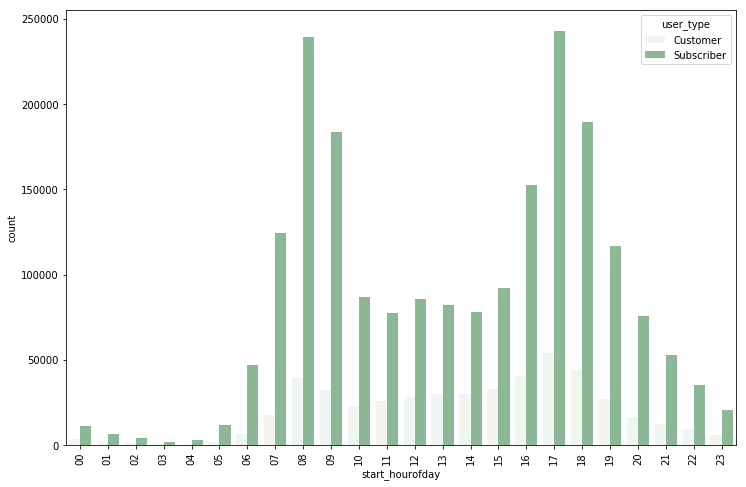

In [33]:
# User type vs start_hourofday
sb.countplot(data=df_cp, x='start_hourofday', color='#86bf91', hue= 'user_type')

# Get the current tick locations and labels of the x-axis
locs, labels = plt.xticks(rotation=90)

# # Re-calculate count
# type_counts = df_cp['duration_sec'].value_counts()

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # Check if the label exists in the type_counts dictionary
    if label.get_text() in type_counts:
        # Get the count for the corresponding label
        count = type_counts[label.get_text()]
        # Calculate the percentage
        pct_string = '{:0.1f}%'.format(100 * count)

        # Print the annotation just above the top of the bar
        plt.text(loc, count + 2, pct_string, ha='center', color='black')

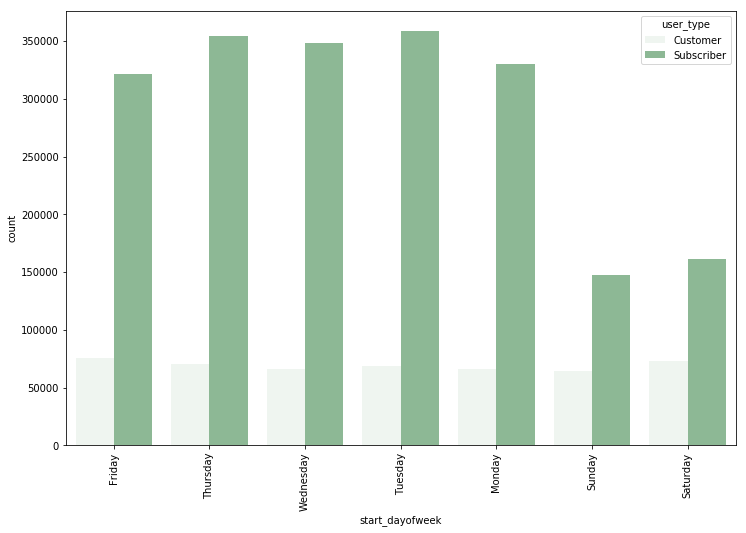

In [34]:
# User type vs start_dayofweek
sb.countplot(data=df_cp, x='start_dayofweek', color='#86bf91', hue= 'user_type')

# Get the current tick locations and labels of the x-axis
locs, labels = plt.xticks(rotation=90)

# # Re-calculate count
# type_counts = df_cp['duration_sec'].value_counts()

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # Check if the label exists in the type_counts dictionary
    if label.get_text() in type_counts:
        # Get the count for the corresponding label
        count = type_counts[label.get_text()]
        # Calculate the percentage
        pct_string = '{:0.1f}%'.format(100 * count)

        # Print the annotation just above the top of the bar
        plt.text(loc, count + 2, pct_string, ha='center', color='black')

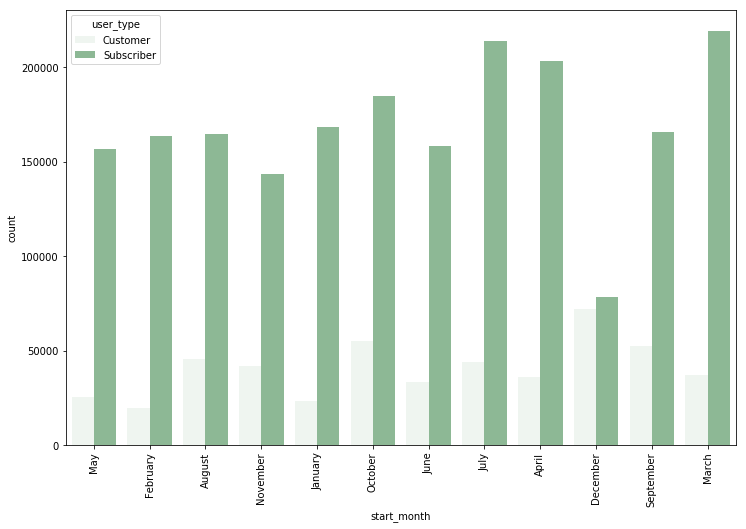

In [35]:
# User type vs start_dayofweek
sb.countplot(data=df_cp, x='start_month', color='#86bf91', hue= 'user_type')

# Get the current tick locations and labels of the x-axis
locs, labels = plt.xticks(rotation=90)

# # Re-calculate count
# type_counts = df_cp['duration_sec'].value_counts()

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # Check if the label exists in the type_counts dictionary
    if label.get_text() in type_counts:
        # Get the count for the corresponding label
        count = type_counts[label.get_text()]
        # Calculate the percentage
        pct_string = '{:0.1f}%'.format(100 * count)

        # Print the annotation just above the top of the bar
        plt.text(loc, count + 2, pct_string, ha='center', color='black')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Explain:
* Subscribers make more trips, but customers are the ones taking the long haul.
* Weekdays trips are made less than weekends whereas on weekends the average length of trips is much longer than during the week.
* For customers, 8 a.m. to 6 p.m. is a popular time to rent bikes. Customer bike usage peaks at 5pm and another peak at 8am, much lower than the 5pm peak.Subscribers make most of their trips between 7-9am and 4-6pm.Subscribers make more trips on weekdays and fewer on weekends. 
* Consumer usage trends are relatively stable during the week but with higher usage on Fridays and Sundays. Bicycle use by both types of users is affected by the season. But customer usage peaked in December, while for subscribers it was the opposite.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The average travel time of a high-traffic bike usage is around 3am. I don't know why?
> After a detailed breakdown of start_time broken down into hours/days/months by duration sec, I've noticed that the trip allocation and average usage time of each trip will vary by user type

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

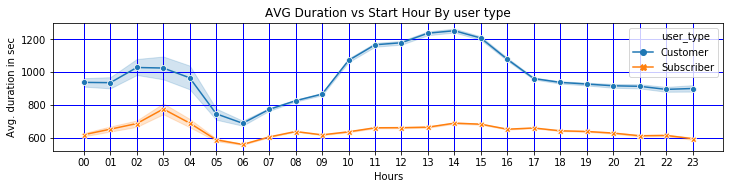

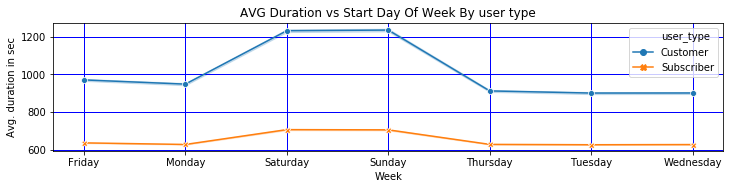

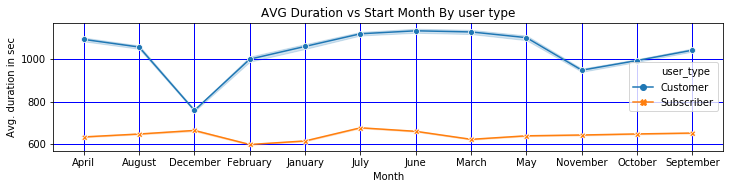

In [36]:
# Draw chart duration sec vs hour, week, month
plt.subplot(3, 1, 1)
sb.lineplot(data = litmit_frame, x = 'start_hourofday', y = 'duration_sec', color = 'red', hue="user_type", style="user_type",
    markers=True, dashes=False)
plt.xlabel('Hours')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.title('AVG Duration vs Start Hour By user type')
plt.show()

plt.subplot(3, 1, 2)
sb.lineplot(data = litmit_frame, x = 'start_dayofweek', y = 'duration_sec', color = 'red', hue="user_type", style="user_type",
    markers=True, dashes=False)
plt.xlabel('Week')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.title('AVG Duration vs Start Day Of Week By user type')
plt.show()

plt.subplot(3, 1, 3)
sb.lineplot(data = litmit_frame, x = 'start_month', y = 'duration_sec', color = 'red', hue="user_type", style="user_type",
    markers=True, dashes=False)
plt.xlabel('Month')
plt.ylabel('Avg. duration in sec');
plt.grid(color='blue', linestyle='-', linewidth=1)
plt.title('AVG Duration vs Start Month By user type')
plt.show()

### Conclusion
* AVG duration for customers are longer than subscribers. Average duration for customers are higher between 10am-5pm reaching its peak at 2pm.
* Daily avg. trip duration for customers are longer than subscribers. Both subscribers and customers take longer trips during weekend than weekdays.
* Monthly avg. trip duration for customers are longer than subscribers. Monthly average duration for subscribers looks stable during the year. The average duration for customers peaks at March and bottom at December.The average duration for subscribe peaks at July and bottom at February.

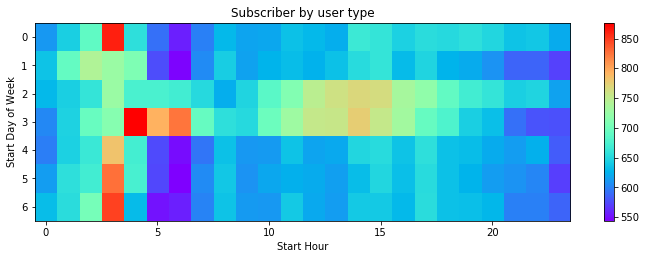

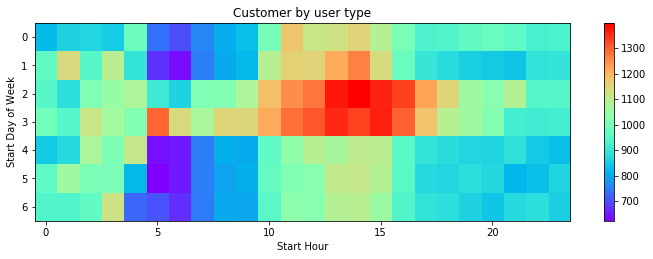

In [37]:
plt.subplot(2, 1, 1)
subscriber_duration_means = litmit_frame.query('user_type == "Subscriber"').groupby(['start_dayofweek', 
                                                                           'start_hourofday']).mean().astype(int)['duration_sec']
#Convert to matrix 2D
subscriber_matrix = subscriber_duration_means.unstack()
# Draw type chart is imshow 
plt.imshow(subscriber_matrix, cmap='rainbow', aspect='auto')
plt.xlabel('Start Hour')
plt.ylabel('Start Day of Week')
plt.title('Subscriber by user type')
plt.colorbar()
plt.show()

plt.subplot(2, 1, 2)
customer_duration_means = litmit_frame.query('user_type == "Customer"').groupby(['start_dayofweek', 
                                                                           'start_hourofday']).mean().astype(int)['duration_sec']
#Convert to matrix 2D
customer_matrix = customer_duration_means.unstack()
# Draw type chart is imshow 
plt.imshow(customer_matrix, cmap='rainbow', aspect='auto')
plt.xlabel('Start Hour')
plt.ylabel('Start Day of Week')
plt.title('Customer by user type')
plt.colorbar()
plt.show()

### Conclusion
* Subscribers have a preference for frequent bike usage during weekdays, particularly in the mornings and evenings. Conversely, customers tend to use bikes more often during the weekends shown by the histogram in bold red around the 6th and 7th day ranges between 10 - 15 pm.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers take longer trips than subscribers, particularly on weekends. The peak time for customer bike usage is at 2pm, and their average duration is highest in March. On the other hand, subscribers primarily use bikes during typical commute hours, with peak usage at 8am and 5pm.

### Were there any interesting or surprising interactions between features?

> One peculiar observation is that I am unsure why they choose to ride bikes at 2am to 4h am.

## Refer:
* https://mode.com/example-gallery/python_histogram/
* https://learn.udacity.com/nanodegrees/nd002/parts/cd0016/lessons/ls2235/concepts/b961e21a-7cd8-4fd8-acee-0b1389ce5f0d
* https://www.analyticsvidhya.com/blog/2021/07/how-to-perform-data-visualization-with-pandas/
* https://www.w3schools.com/python/pandas/pandas_plotting.asp
* https://mode.com/example-gallery/python_histogram/
* https://stackoverflow.com/questions/51846948/seaborn-lineplot-module-object-has-no-attribute-lineplot
* https://www.tripadvisor.com/Attraction_Review-g60713-d12951811-Reviews-Ford_GoBike-San_Francisco_California.html
* https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
* https://learn.udacity.com/nanodegrees/nd002/parts/cd0016/lessons/ls2235/concepts/fc6437d7-2199-46b4-afb7-916e315b7539
* https://learn.udacity.com/nanodegrees/nd002/parts/cd0016/lessons/ls2235/concepts/2ae80939-e9db-4734-bff3-bf23f37eeba9
* https://qiita.com/SaitoTsutomu/items/c79c9973a92e1e2c77a7
* https://towardsdatascience.com/how-to-export-pandas-dataframe-to-csv-2038e43d9c03
